In [1]:


import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-accidents/US_Accidents_March23.csv
/kaggle/input/us-accidents-dec2021/US_Accidents_Dec21_updated.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_USA=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:

print(df_USA.isnull().sum())

df_USA = df_USA.dropna()

print(df_USA.isnull().sum())


ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [5]:
# heck for missing valuesC
print(df_USA.isnull().sum())

# Fill or drop missing values as appropriate
df_USA = df_USA.dropna(subset=['Start_Time', 'Weather_Condition', 'Start_Lat', 'Start_Lng', 'Severity'])

# Verify that there are no more missing values in these columns
print(df_USA[['Start_Time', 'Weather_Condition', 'Start_Lat', 'Start_Lng', 'Severity']].isnull().sum())



ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [6]:
print(df_USA.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [7]:
# Analyzing the number of accidents by time of day
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'])  # Ensure the 'Start_Time' column is in datetime format
df_USA['hour'] = df_USA['Start_Time'].dt.hour

# Group by hour to see the distribution of accidents by time of day
accidents_by_hour = df_USA['hour'].value_counts().sort_index()

# Analyzing the impact of weather conditions
weather_conditions = df_USA['Weather_Condition'].value_counts()

# Analyzing the impact of severity as a proxy for road conditions
severity_conditions = df_USA['Severity'].value_counts()


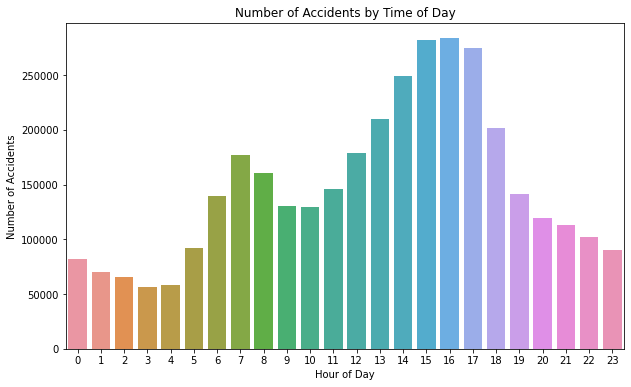

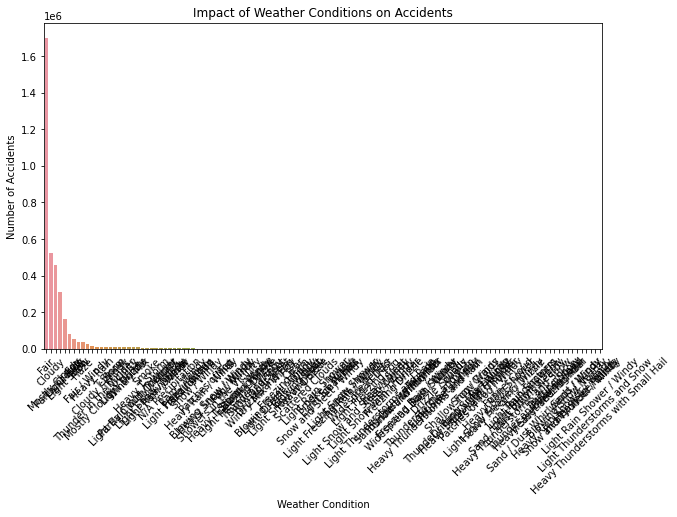

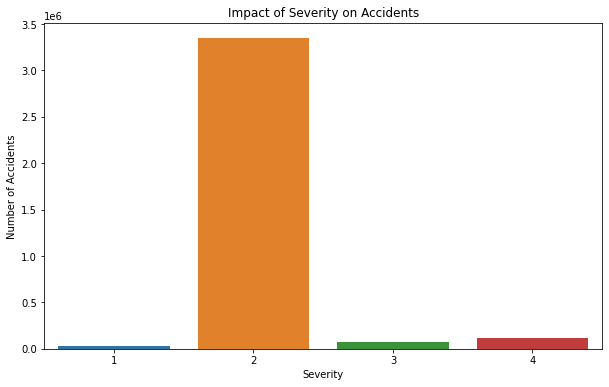

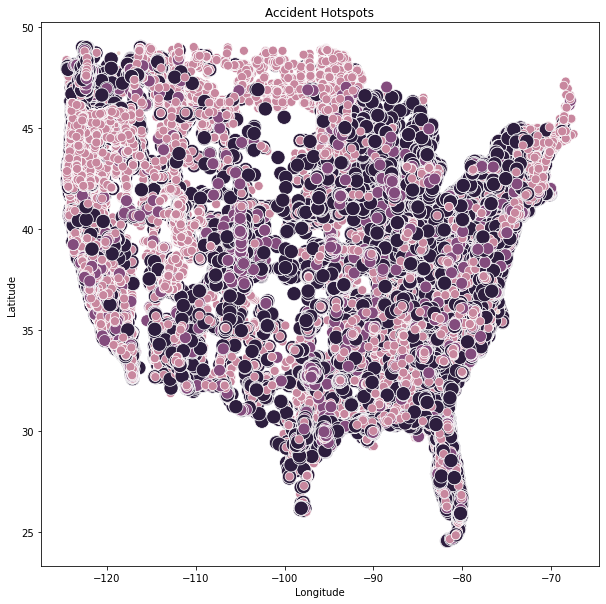

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of accidents by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Plotting the impact of weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values)
plt.title('Impact of Weather Conditions on Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Plotting the impact of severity (as a proxy for road conditions)
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_conditions.index, y=severity_conditions.values)
plt.title('Impact of Severity on Accidents')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

# Identifying accident hotspots
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_USA, hue='Severity', size='Severity', sizes=(20, 200))
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend([],[], frameon=False)
plt.show()
